# 新型冠状病毒数据分析演示

新型冠状病毒（2019-nCov) 的疫情牵动着全世界人民的心，而理性地对待离不开数据和分析。为了让人民大众及时了解情况，很多网站都公布疫情的实时信息。比方说[丁香园疫情实时动态](https://ncov.dxy.cn/ncovh5/view/pneumonia)， [腾讯疫情实时追踪](https://news.qq.com/zt2020/page/feiyan.htm)， [约翰霍普金斯实时新冠地图](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) 等等。这些网站快速地为公众提供了信息，增加了透明度。但是如果读者希望对疫情有进一步的了解，这些网站就不够用了。比方说，如果你想得到过去十天湖北省确诊人数，那就只能从趋势图上作个估计了。再比方说，如果你想对比一下湖南、广东、浙江三省在过去十天的新增确诊人数，那么单凭网页数据也无能为力了。

为了取得可以供研究使用的数据，[DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) 项目利用网络爬虫不断从网上抓取数据，更新并存成 CSV 格式。然而，这个 CSV 文件包含的是不同时刻网页上的信息片段，有的时候只有这几个城市，有的时候只有那几个城市，数据并不规整。

为了进一步方便用户进行研究，本项目[nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) 提供了一些基本工具，把实时数据规整为每日数据，方便用户按时间、省份、城市等方法检索。同时，本项目还提供了基本的时间序列和横向分析作图函数，方便用户取得基本信息。

以下是基本使用方法演示：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils   # some convenient functions

%load_ext autoreload
%autoreload 2

## 1. 获取原始 CSV 数据

In [22]:
data = utils.load_chinese_data()

Last update:  2020-02-11 10:41:08.527000
Data date range:  2020-01-24 to 2020-02-11
Number of rows in raw data:  31324


In [3]:
data.head(3)  # 查看数据形式

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,湖南省,长沙,912,0,213,1,219,0,39,0,2020-02-11 09:42:07.368,2020-02-11
1,湖南省,岳阳,912,0,213,1,134,0,21,1,2020-02-11 09:42:07.368,2020-02-11
2,湖南省,邵阳,912,0,213,1,91,0,22,0,2020-02-11 09:42:07.368,2020-02-11


## 2. 数据预处理
### 2.1 把实时数据整合成每日数据

In [5]:
daily_frm = utils.aggDaily(data, clean_dates=True)

The following dates are removed due to insufficient provinces reported:  [datetime.date(2020, 2, 11)]


In [6]:
daily_frm.tail(3)

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
1100,黑龙江省,鹤岗,5,1,0,2020-02-10 15:27:06.531,2020-02-10
1101,黑龙江省,黑河,4,0,0,2020-02-10 15:27:06.531,2020-02-10
1095,黑龙江省,齐齐哈尔,30,0,1,2020-02-10 15:27:06.531,2020-02-10


### 2.2 用 utils.add_dailyNew() 加入每日新增确诊、死亡、治愈人数

In [7]:
daily_frm = utils.add_dailyNew(daily_frm)

In [8]:
daily_frm[daily_frm['cityName'] == '武汉'][['confirmed', 'dailyNew_confirmed', 'dead', 'dailyNew_dead', 'cured', 'dailyNew_cured', 'updateDate']][:5]

,confirmed,dailyNew_confirmed,dead,dailyNew_dead,cured,dailyNew_cured,updateDate
30372,495,NaN,23,NaN,31,NaN,2020-01-24
29197,572,77.0,38,15.0,32,1.0,2020-01-25
28548,618,46.0,45,7.0,40,8.0,2020-01-26
27369,698,80.0,63,18.0,42,2.0,2020-01-27
26565,1590,892.0,85,22.0,47,5.0,2020-01-28


### 2.3 用 utils.add_en_location() 加入省份、城市的英文（拼音）翻译，方便英文系统平台的用户

In [9]:
daily_frm = utils.add_en_location(daily_frm)

In [10]:
daily_frm[['provinceName', 'cityName', 'provinceName_en', 'cityName_en', 'confirmed', 'dead', 'cured', 'updateDate']].head()

,provinceName,cityName,provinceName_en,cityName_en,confirmed,dead,cured,updateDate
30170,云南省,丽江市,Yunnan,Lijiang,1,0,0,2020-01-24
30168,云南省,昆明,Yunnan,Kunming,3,0,0,2020-01-24
30169,云南省,西双版纳,Yunnan,Xishuangbanna,1,0,0,2020-01-24
30514,内蒙古自治区,满洲里,Neimenggu,Manzhouli,1,0,0,2020-01-24
31042,北京市,不明地区,Beijing,Unknown,8,0,0,2020-01-24


## 3. 数据查看

### 3.1 提取部分信息

#### 用 provinceName 检索省级数据

In [11]:
daily_frm[daily_frm['provinceName'] == '广东省']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
30181,广东省,中山,2,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Zhongshan
30175,广东省,佛山,7,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Foshan
30176,广东省,广州,7,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Guangzhou
30177,广东省,惠州,5,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Huizhou
30173,广东省,深圳,15,2,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Shenzhen
...,...,...,...,...,...,...,...,...,...,...,...,...
567,广东省,珠海,85,4,0,2020-02-10 21:36:08.643,2020-02-10,2.0,0.0,0.0,Guangdong,Zhuhai
575,广东省,肇庆,15,4,1,2020-02-10 21:36:08.643,2020-02-10,1.0,0.0,1.0,Guangdong,Zhaoqing
579,广东省,茂名,10,1,0,2020-02-10 21:36:08.643,2020-02-10,0.0,0.0,0.0,Guangdong,Maoming
576,广东省,阳江,13,1,0,2020-02-10 21:36:08.643,2020-02-10,0.0,0.0,0.0,Guangdong,Yangjiang


#### 用 cityName 检索市级数据

In [12]:
daily_frm[daily_frm['cityName'] == '武汉']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
30372,湖北省,武汉,495,31,23,2020-01-24 17:30:09.978,2020-01-24,NaN,NaN,NaN,Hubei,Wuhan
29197,湖北省,武汉,572,32,38,2020-01-25 23:55:35.775,2020-01-25,77.0,15.0,1.0,Hubei,Wuhan
28548,湖北省,武汉,618,40,45,2020-01-26 13:50:35.848,2020-01-26,46.0,7.0,8.0,Hubei,Wuhan
27369,湖北省,武汉,698,42,63,2020-01-27 16:42:57.343,2020-01-27,80.0,18.0,2.0,Hubei,Wuhan
26565,湖北省,武汉,1590,47,85,2020-01-28 16:36:17.441,2020-01-28,892.0,22.0,5.0,Hubei,Wuhan
25371,湖北省,武汉,1905,54,104,2020-01-29 20:34:44.154,2020-01-29,315.0,19.0,7.0,Hubei,Wuhan
24192,湖北省,武汉,2261,54,129,2020-01-30 22:24:37.371,2020-01-30,356.0,25.0,0.0,Hubei,Wuhan
22552,湖北省,武汉,2639,103,159,2020-01-31 22:06:41.473,2020-01-31,378.0,30.0,49.0,Hubei,Wuhan
20261,湖北省,武汉,3215,106,192,2020-02-01 19:49:55.626,2020-02-01,576.0,33.0,3.0,Hubei,Wuhan
18388,湖北省,武汉,4109,175,224,2020-02-02 20:50:05.247,2020-02-02,894.0,32.0,69.0,Hubei,Wuhan


#### 也可以用 provinceName_en, cityName_en 进行英文（拼音）检索
（请注意，因为可能存在不同城市的汉字对应相同的拼音，所以检索城市时请尽量使用汉字。如果使用拼音检索，请务必保证其对应汉字城市的唯一性）

In [13]:
daily_frm[daily_frm['cityName_en'] == 'Guangzhou'].head()

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
30176,广东省,广州,7,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Guangzhou
29838,广东省,广州,14,0,0,2020-01-25 10:56:23.314,2020-01-25,7.0,0.0,0.0,Guangdong,Guangzhou
28429,广东省,广州,17,0,0,2020-01-26 18:26:35.233,2020-01-26,3.0,0.0,0.0,Guangdong,Guangzhou
27255,广东省,广州,41,0,0,2020-01-27 21:01:37.693,2020-01-27,24.0,0.0,0.0,Guangdong,Guangzhou
26472,广东省,广州,51,0,0,2020-01-28 18:44:36.890,2020-01-28,10.0,0.0,0.0,Guangdong,Guangzhou


#### 用 updateDate 检索单日数据

In [14]:
daily_frm[daily_frm['updateDate'] == pd.to_datetime('2020-01-27')]

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
27406,上海市,嘉定区,1,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Jiadingqu
27396,上海市,外地来沪人员,23,3,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Non_Residence
27407,上海市,奉贤区,1,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Fengxian
27405,上海市,宝山区,1,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Baoshanqu
27400,上海市,徐汇区,3,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Xuhuiqu
...,...,...,...,...,...,...,...,...,...,...,...,...
27899,黑龙江省,哈尔滨,8,0,0,2020-01-27 09:10:03.105,2020-01-27,0.0,0.0,0.0,Helongjiang,Ha_erbin
27900,黑龙江省,大庆,5,0,0,2020-01-27 09:10:03.105,2020-01-27,2.0,0.0,0.0,Helongjiang,Daqing
27902,黑龙江省,牡丹江,1,0,0,2020-01-27 09:10:03.105,2020-01-27,0.0,0.0,0.0,Helongjiang,Mudanjiang
27901,黑龙江省,绥化,3,0,1,2020-01-27 09:10:03.105,2020-01-27,1.0,0.0,0.0,Helongjiang,Suihua


### 3.2 时序比较图 utils.tsplot_conf_dead_cured()

#### 全国累计确诊、每日新增确诊、死亡、治愈时间序列图

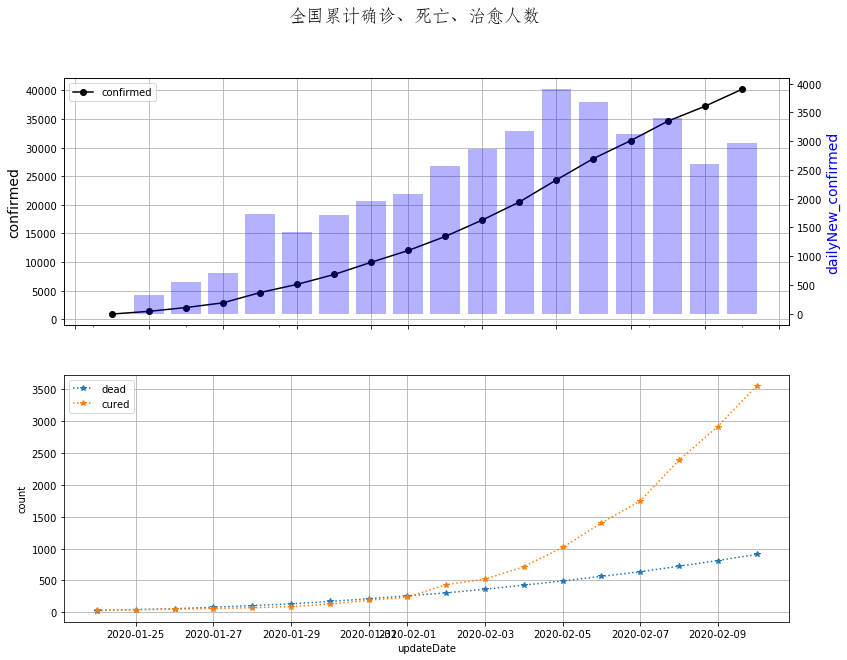

In [15]:
fig = utils.tsplot_conf_dead_cured(daily_frm, title_prefix='全国')
plt.show()

#### 单个省份的时间序列也很容易，只要把想要的省份数据检索出来作为输入就可以了

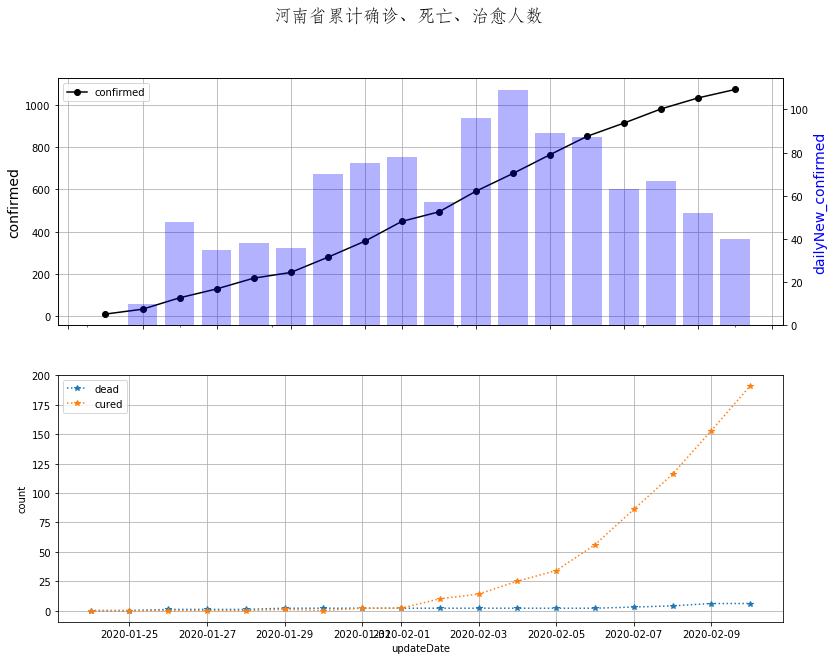

In [16]:
province = '河南省'   # 输入你所要的省份
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['provinceName'] == province], title_prefix=province)
plt.show()                                  

#### 单个城市用法也是一样的, 还可以使用 logy=True 画指数图，看人数是否指数增长

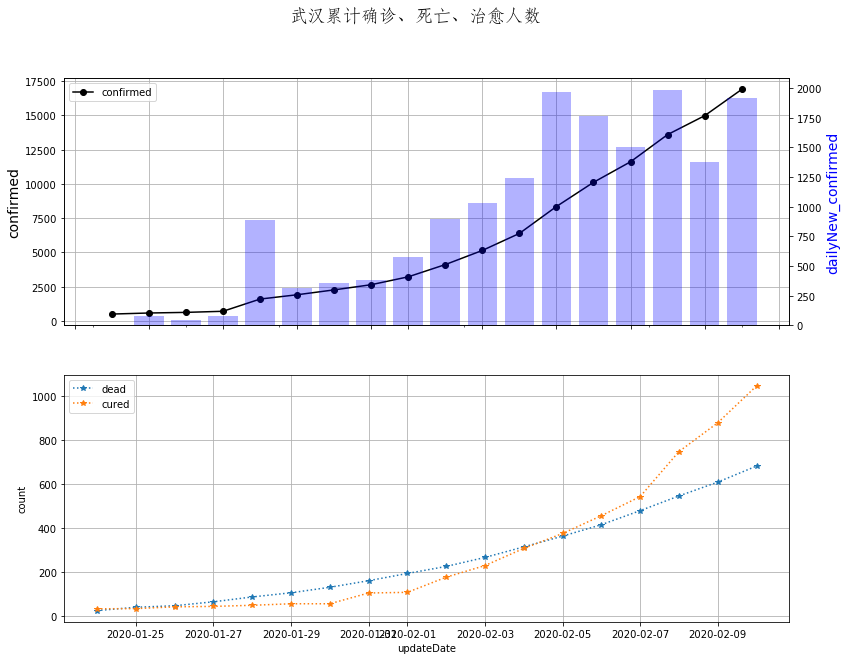

In [17]:
city = '武汉'
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['cityName'] == city], title_prefix=city, logy=False)
plt.show()  

### 3.3 横向比较图 utils.cross_sectional_bar()

#### 各省份在2月三号确诊数比较

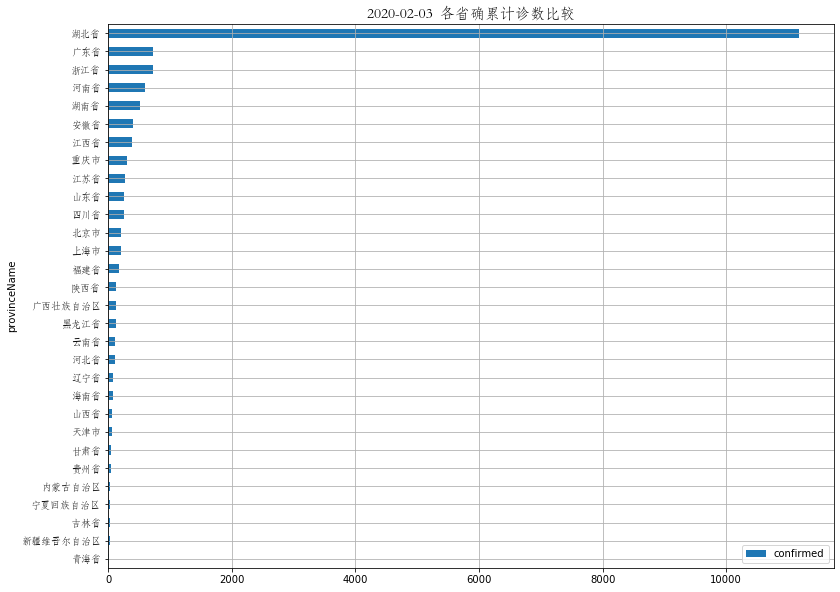

In [18]:
utils.cross_sectional_bar(daily_frm, '2020-02-03', col='confirmed', groupby='provinceName', title='各省确累计诊数比较')

#### 湖北省各地2月1号死亡数比较

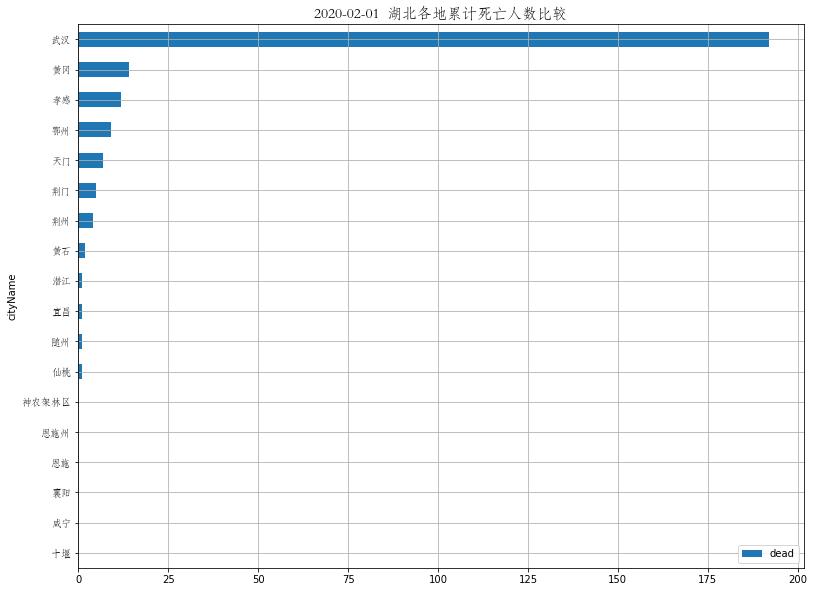

In [19]:
utils.cross_sectional_bar(daily_frm[daily_frm['provinceName'] == '湖北省'], '2020-02-01', col='dead', 
                        groupby='cityName', title='湖北各地累计死亡人数比较')

#### 全国2月5日新增确诊最多的十个城市 （用 largestN 参数限制横条数目）

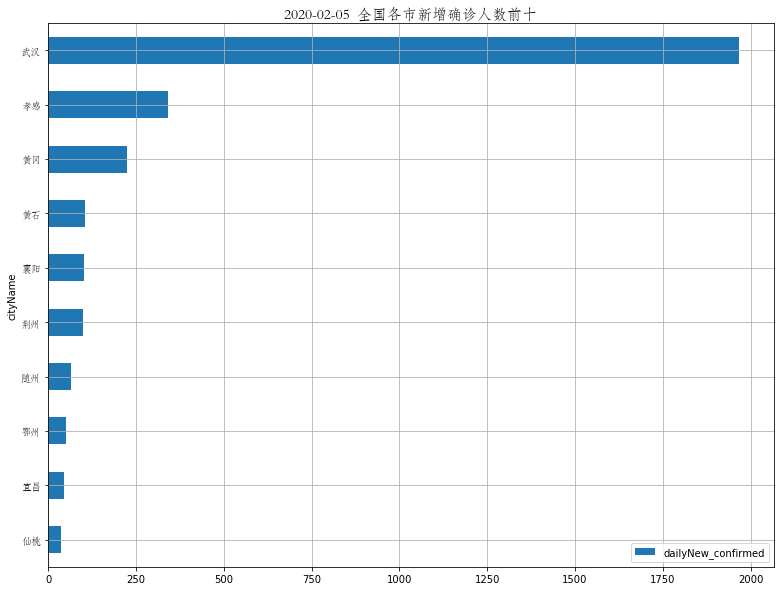

In [20]:
utils.cross_sectional_bar(daily_frm, '2020-02-05', col='dailyNew_confirmed', 
                        groupby='cityName', title='全国各市新增确诊人数前十', largestN=10)